In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import docx

In [2]:
#making a df by importing the values from the human cell reads txt

df = pd.read_csv('human_reads_small.txt', sep='\t', header=None)
header = ['chr', 'start_pos','end_pos','human_reads']
df.columns = header[:len(df.columns)]
df['chr'] = df['chr'].str.replace('chr','').astype(int) #CHR COLUMN
df = df.reset_index()

In [3]:
#making another df from the mutated reads file
mutated = pd.read_csv('altered_reads_small.txt', sep='\t', header=None)
header = ['chromosome', 'start_pos','end_pos','mutated_reads']
mutated.columns = header[:len(mutated.columns)]
mutated

,chromosome,start_pos,end_pos,mutated_reads
0,chr1,0,50000,8
1,chr1,50000,100000,8
2,chr1,100000,150000,12
3,chr1,150000,200000,10
4,chr1,200000,250000,0
...,...,...,...,...
57504,chr22,50600000,50650000,14
57505,chr22,50650000,50700000,6
57506,chr22,50700000,50750000,8
57507,chr22,50750000,50800000,6


In [4]:
#adding the mutated reads column to the original  df
df['mutated_reads'] = mutated['mutated_reads'].values
df


,index,chr,start_pos,end_pos,human_reads,mutated_reads
0,0,1,0,50000,4,8
1,1,1,50000,100000,22,8
2,2,1,100000,150000,4,12
3,3,1,150000,200000,12,10
4,4,1,200000,250000,0,0
...,...,...,...,...,...,...
57504,57504,22,50600000,50650000,2,14
57505,57505,22,50650000,50700000,6,6
57506,57506,22,50700000,50750000,6,8
57507,57507,22,50750000,50800000,12,6


In [5]:
#making RDR column
df['RDR'] = (df['mutated_reads'] / df['human_reads']) * (df['human_reads'].sum() / df['mutated_reads'].sum())
df

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
0,0,1,0,50000,4,8,2.230325
1,1,1,50000,100000,22,8,0.405514
2,2,1,100000,150000,4,12,3.345487
3,3,1,150000,200000,12,10,0.929302
4,4,1,200000,250000,0,0,NaN
...,...,...,...,...,...,...,...
57504,57504,22,50600000,50650000,2,14,7.806137
57505,57505,22,50650000,50700000,6,6,1.115162
57506,57506,22,50700000,50750000,6,8,1.486883
57507,57507,22,50750000,50800000,12,6,0.557581


In [6]:
len(df)

57509

ANALYSIS

--------------- CHR8, NORMAL COPY NUMBER -----------------------------------

In [7]:
chr20 = df[df['chr']==20] #what a normal copy number RDR looks like. 
len(chr20)

1289

In [169]:
chr20_inf_RDR = chr20[chr20['RDR']== np.inf] #what a normal copy number RDR looks like. 
chr20_inf_RDR

#all 20 occurences due to human read recordings of 0

#20/2903 0.7% of these had infinite RDR values, skewing the results for a normal read

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
54269,54269,20,50000,100000,0,4,inf
54363,54363,20,4750000,4800000,0,20,inf
54532,54532,20,13200000,13250000,0,4,inf
54553,54553,20,14250000,14300000,0,12,inf
54614,54614,20,17300000,17350000,0,8,inf
54888,54888,20,31000000,31050000,0,2,inf
54959,54959,20,34550000,34600000,0,20,inf
54967,54967,20,34950000,35000000,0,4,inf
55116,55116,20,42400000,42450000,0,12,inf
55481,55481,20,60650000,60700000,0,6,inf


In [170]:
number_inf_table = chr20[chr20 == np.inf]
number_inf_table

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
54268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54269,NaN,NaN,NaN,NaN,NaN,NaN,inf
54270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
number_inf = chr20[chr20 == np.inf].count()
number_inf

#20 of them included infinity values

index             0
chr               0
start_pos         0
end_pos           0
human_reads       0
mutated_reads     0
RDR              10
dtype: int64

In [172]:
chr20 = chr20.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [173]:
chr20.dropna(inplace=True)
len(chr20)


1276

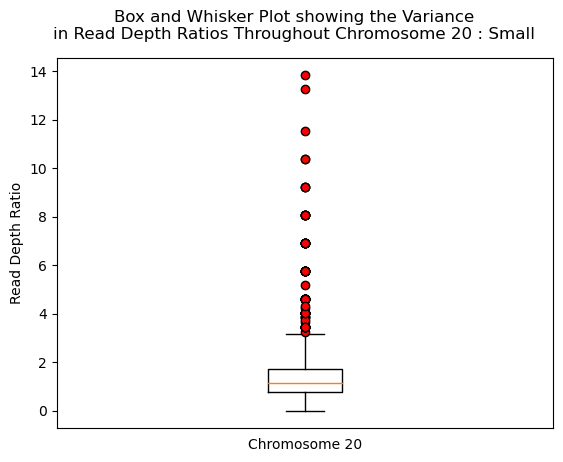

In [174]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr20.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 20 : Small """)

plt.xlabel('Chromosome 20')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Norm_chr20_small.png', dpi=200 )
plt.show()



In [175]:
chr20.loc[:,'RDR'].describe()

count    1276.000000
mean        1.526521
std         1.413720
min         0.000000
25%         0.769870
50%         1.154805
75%         1.732208
max        13.857662
Name: RDR, dtype: float64

In [176]:
# chr8.loc[:,'RDR'].mean() #mean RDR of a normal cell

In [177]:
# UQ_chr8 = chr8.loc[:,'RDR'].quantile(0.75)
# LQ_chr8 = chr8.loc[:,'RDR'].quantile(0.25)
# IQR_chr8 = UQ_chr8-LQ_chr8
# upper_outliers_chr8 = UQ_chr8 + (1.25*IQR_chr8)
# lower_outliers_chr8 = LQ_chr8 - (1.25*IQR_chr8)

In [178]:
# IQR_chr8

In [179]:
# chr8_without_outliers = chr8[[chr8['RDR'] < upper_outliers_chr8] and chr8['RDR'] > lower_outliers_chr8] 
# chr8_without_outliers.loc[:,'RDR'].mean()

In [180]:
chr20.loc[:,'RDR'].quantile(0.95)

4.041818082633252

In [117]:

# chr8_without_outliers.loc[:,'RDR'].quantile(0.95)

3.6568830271443713

----- chr21: NORMAL COPY NUMBER AGAIN -----------

In [118]:
chr21 = df[df['chr']==21] #what a normal copy number RDR looks like. 
len(chr21)

935

In [119]:
chr21 = chr21.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
chr21.dropna(inplace=True)
chr21


,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
55657,55657,21,5000000,5050000,8,8,1.154805
55658,55658,21,5050000,5100000,8,12,1.732208
55659,55659,21,5100000,5150000,6,18,3.464415
55660,55660,21,5150000,5200000,8,0,0.000000
55661,55661,21,5200000,5250000,6,6,1.154805
...,...,...,...,...,...,...,...
56486,56486,21,46450000,46500000,14,14,1.154805
56487,56487,21,46500000,46550000,12,2,0.192468
56488,56488,21,46550000,46600000,10,12,1.385766
56489,56489,21,46600000,46650000,12,10,0.962338


In [120]:
chr21.loc[:,'RDR'].describe()

count    775.000000
mean       1.501455
std        1.442955
min        0.000000
25%        0.692883
50%        1.154805
75%        1.732208
max       13.857662
Name: RDR, dtype: float64

In [121]:
chr21.loc[:,'RDR'].quantile(0.95)

3.464415499399931

---------------- CHR2 : HOMOZYGOUS DELETION ----------------------

In [122]:
chr2 = df[df['chr']==2] #what a homozgyous copy number RDR looks like. 

chr2.dropna(inplace=True)

len(chr2)

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_16247/1108414522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr2.dropna(inplace=True)


4782

In [123]:
chr2['mutated_reads'].mean()

0.03053115851108323

In [124]:
chr2.loc[:,'mutated_reads'].describe()

count    4782.000000
mean        0.030531
std         0.271162
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: mutated_reads, dtype: float64

In [125]:
chr2['human_reads'].mean()

10.076746131325805

In [126]:
x2 = chr2.nlargest(20, 'RDR')
x2

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
5444,5444,2,23200000,23250000,4,4,1.154805
8375,8375,2,169750000,169800000,2,2,1.154805
8052,8052,2,153600000,153650000,6,4,0.769870
5643,5643,2,33150000,33200000,4,2,0.577403
6314,6314,2,66700000,66750000,4,2,0.577403
6532,6532,2,77600000,77650000,4,2,0.577403
6771,6771,2,89550000,89600000,4,2,0.577403
7249,7249,2,113450000,113500000,4,2,0.577403
7251,7251,2,113550000,113600000,8,4,0.577403
7676,7676,2,134800000,134850000,4,2,0.577403


In [127]:
chr2_above_zero = chr2[chr2['RDR'] > 0]
chr2_above_zero
len(chr2_above_zero)

66

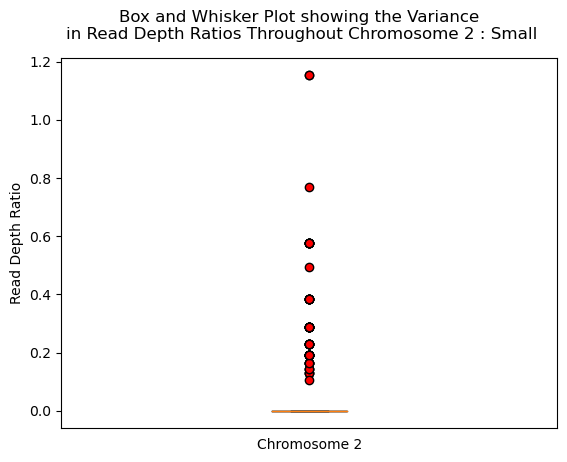

In [128]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr2.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 2 : Small""")

plt.xlabel('Chromosome 2')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('HD_chr2_small_with_outliers.png', dpi=200 )

plt.show()



In [129]:
chr2.loc[:,'RDR'].quantile(0.95)

0.0

In [130]:
chr2.loc[:,'RDR'].describe()

count    4782.000000
mean        0.004397
std         0.044504
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.154805
Name: RDR, dtype: float64

In [131]:
chr2_outliers = chr2[chr2['RDR']> 0.07]
chr2_outliers['RDR'].max()

1.1548051664666437

In [132]:
chr2_filtered = chr2[chr2['RDR']< 0.2]
chr2_filtered

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
4980,4980,2,0,50000,6,0,0.0
4981,4981,2,50000,100000,14,0,0.0
4982,4982,2,100000,150000,10,0,0.0
4983,4983,2,150000,200000,8,0,0.0
4984,4984,2,200000,250000,24,0,0.0
...,...,...,...,...,...,...,...
9817,9817,2,241850000,241900000,4,0,0.0
9818,9818,2,241900000,241950000,6,0,0.0
9819,9819,2,241950000,242000000,4,0,0.0
9820,9820,2,242000000,242050000,8,0,0.0


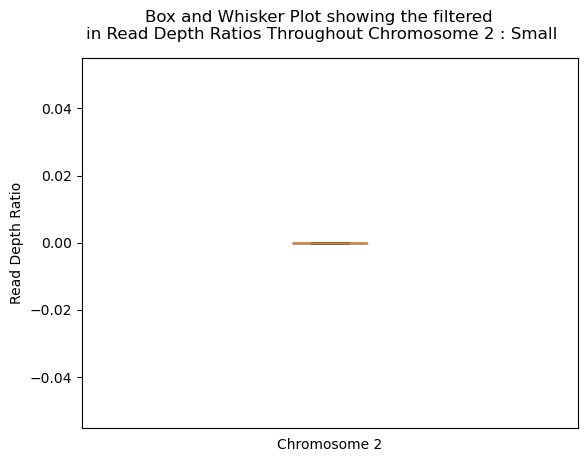

In [133]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr2_filtered.loc[:,'RDR'], flierprops=red_circle, showfliers=False)

plt.suptitle("""Box and Whisker Plot showing the filtered 
in Read Depth Ratios Throughout Chromosome 2 : Small""")
             


plt.xlabel('Chromosome 2')
plt.xticks([])
plt.ylabel('Read Depth Ratio')



plt.show()

In [134]:
0.02502

0.02502

In [135]:
chr2_filtered.loc[:,'RDR'].describe()

count    4742.000000
mean        0.000937
std         0.012773
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.192468
Name: RDR, dtype: float64

In [136]:
UQ_chr2 = chr2.loc[:,'RDR'].quantile(0.75)
LQ_chr2 = chr2.loc[:,'RDR'].quantile(0.25)
IQR_chr2 = (UQ_chr2) -(LQ_chr2)
upper_outliers_chr2 = UQ_chr2 + (1.25* IQR_chr2)

In [137]:
IQR_chr2

0.0

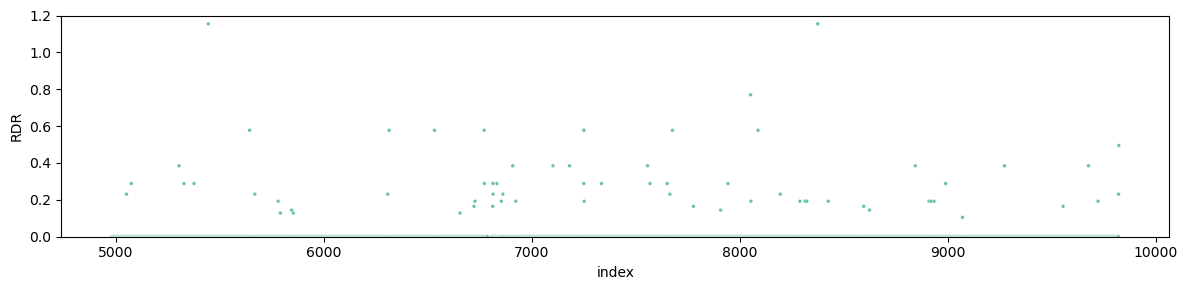

In [138]:
plt.figure(figsize=(12,3))
chr2 = sns.scatterplot(data=chr2, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

chr2.set_ylim(0, 1.2)

plt.tight_layout()

plt.savefig('chr2_small_scatterplot', dpi=200 )

In [140]:
#chr2[chr2['RDR'] > upper_outliers_chr2]  #only 3 values with an RDR above 0.0333

In [142]:
#chr2_without_outliers = chr2[chr2['RDR'] < upper_outliers_chr2] 
#chr2_without_outliers.loc[:,'RDR'].mean()

---------------- CHR17 : HETEROZYGOUS DELETION ----------------------

In [153]:
chr17 = df[df['chr']==17]
len(chr17)

1666

In [154]:
chr17_inf_RDR = chr17[chr17['RDR']== np.inf] #what a normal copy number RDR looks like. 
chr17_inf_RDR


,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
50004,50004,17,9150000,9200000,0,5,inf
50014,50014,17,9650000,9700000,0,4,inf
50374,50374,17,27650000,27700000,0,10,inf
50527,50527,17,35300000,35350000,0,6,inf
50558,50558,17,36850000,36900000,0,4,inf
50602,50602,17,39050000,39100000,0,6,inf
50700,50700,17,43950000,44000000,0,10,inf
51105,51105,17,64200000,64250000,0,4,inf
51338,51338,17,75850000,75900000,0,6,inf
51416,51416,17,79750000,79800000,0,8,inf


In [156]:
len(chr17_inf_RDR)


11

In [157]:
chr17 = chr17.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
len(chr17)

1650

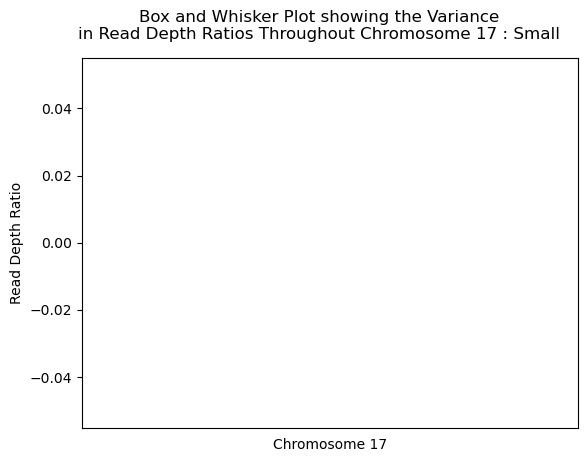

In [144]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr17.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 17 : Small """)
             
plt.xlabel('Chromosome 17')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Het_D_chr17_small.png', dpi=200 )
plt.show()



In [158]:
chr17.loc[:,'RDR'].describe()

count    1650.000000
mean        0.735463
std         0.762393
min         0.000000
25%         0.288701
50%         0.577403
75%         0.923844
max         6.928831
Name: RDR, dtype: float64

In [146]:
UQ_chr17 = chr17.loc[:,'RDR'].quantile(0.75)
LQ_chr17 = chr17.loc[:,'RDR'].quantile(0.25)
IQR_chr17 = (UQ_chr17) -(LQ_chr17)
upper_outliers_chr17 = UQ_chr17 + (1.25* IQR_chr17)

In [159]:
chr17.loc[:,'RDR'].quantile(0.95)

1.9246752774444063

In [148]:
IQR_chr17

0.635142841556654

In [149]:
chr17[chr17['RDR'] > upper_outliers_chr17]  #only 3 values with an RDR above 0.0333

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
49823,49823,17,100000,150000,2,6,3.464415
49831,49831,17,500000,550000,4,6,1.732208
49858,49858,17,1850000,1900000,4,6,1.732208
49876,49876,17,2750000,2800000,4,12,3.464415
49889,49889,17,3400000,3450000,4,6,1.732208
...,...,...,...,...,...,...,...
51431,51431,17,80500000,80550000,2,6,3.464415
51438,51438,17,80850000,80900000,4,8,2.309610
51442,51442,17,81050000,81100000,8,12,1.732208
51454,51454,17,81650000,81700000,4,8,2.309610


In [150]:
chr17_without_outliers = chr17[chr17['RDR'] < upper_outliers_chr17] 
chr17_without_outliers.loc[:,'RDR'].mean()

0.5641190594836081

MAPPING THESE ALL ON THE SAME GRAPH

Decided it's not a good comparison

In [151]:

combined_dfs = pd.DataFrame({'2': chr2['RDR'],
                             '8': chr20['RDR'],
                             '17': chr17['RDR'],
                             })
combined_dfs

sns.set_style('white')
sns.boxplot(data=combined_dfs, palette='flare')
plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosomes :Small """)
plt.xlabel('Chromosome')
plt.ylabel('Read Depth Ratio')
sns.despine()
plt.savefig('combined_RDR_small', dpi=200 )
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

GENOME WIDE RDR 

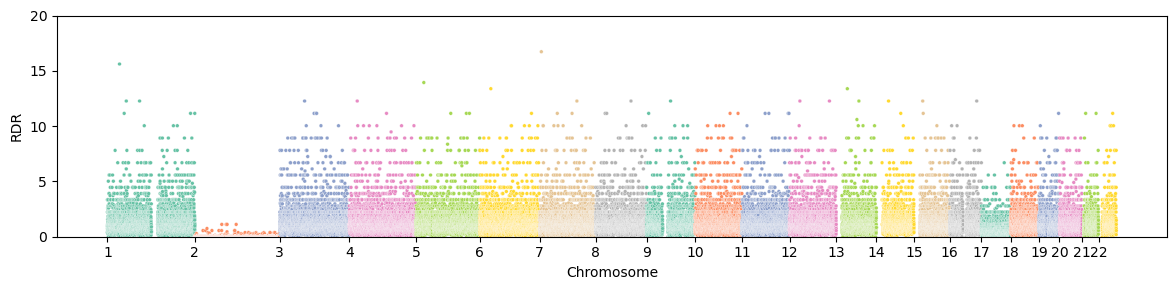

In [6]:
chromosome_pos = df.groupby('chr')['index'].first()

plt.figure(figsize=(12,3))
scatter = sns.scatterplot(data=df, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

plt.xticks(chromosome_pos.values, chromosome_pos.index)

plt.xlabel('Chromosome')

scatter.set_ylim(0, 20)

plt.tight_layout()

plt.savefig('Genome_wide_RDR_small_updated', dpi=200 )